<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #10: Twitter
`Fecha de entrega: Noviembre 14, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

Leonardo Rubio Salcedo 

Bogota cuenta con un total de casos de covid 337.000 de las cuales 305.000 personas ya se recuperaron y tiene registradas 7917 muertes, por lo que la pregunta es ahora los Bogotanos que piensan del Covid-19

###  `[25 pts]` Punto 1: Extraer Tuits
Extraer mínimo 100 tuits de Twitter usando la API

(Si exponen sus claves, les haré maldades 😈)

❌🎃❌ ¡No Halloween!

In [15]:
import pandas as pd
import tweepy

In [16]:
# Leer llaves
keys = pd.read_csv("keys_demo.csv", header=None, sep='\t')
keys = dict(zip(keys[0],keys[1]))

In [17]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [18]:
tweets = tweepy.Cursor(api.search,
                       q=['covid -RT'],
                       lang='es',
                       geocode=f'4.610147,-74.075608,23km',
                       tweet_mode='extended',
                       include_rts=False).items(2000)

In [19]:
t = []
for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogota")
    temp.append(tweet.user.location)
    temp.append(tweet.place)
    temp.append(tweet.coordinates)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    t.append(temp)

In [20]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'place', 'coordinates', 'id', 'link']

In [21]:
import re
 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'
 
def text_clean(row):
    text = row['tweet']

    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")

    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")

    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")

    return text, links, hashtags, mentions

In [22]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')



,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions
0,«Hay que dejar de ser un país de maricas»: Bol...,2020-11-10 23:10:36,Bogota,"Bogotá, Colombia",None,None,1326301261268987905,https://twitter.com/i/web/status/1326301261268...,«Hay que dejar de ser un país de maricas»: Bol...,[https://t.co/qF3wrPtulf],[#Brasil],[]
1,#NoticiasCapital | Continúa la implementación ...,2020-11-10 23:10:00,Bogota,"Bogotá, Colombia",None,None,1326301107895767040,https://twitter.com/i/web/status/1326301107895...,| Continúa la implementación de medidas contr...,[https://t.co/rz7TN7nAIv],[#NoticiasCapital],[]
2,El problema de creer que a los niños no les da...,2020-11-10 23:08:09,Bogota,"Bogotá, Colombia",None,None,1326300643573850112,https://twitter.com/i/web/status/1326300643573...,El problema de creer que a los niños no les da...,[https://t.co/jzQURHwBa6],[],[]
3,a este paso la moda será no ser positivo covid...,2020-11-10 23:07:24,Bogota,BOGOTÁ,None,None,1326300453966123014,https://twitter.com/i/web/status/1326300453966...,a este paso la moda será no ser positivo covid...,[],[#suerteenelplatanal],[]
4,Uy hace un siglo no como esto por miedo al cov...,2020-11-10 23:07:16,Bogota,"Bogotá, Colombia",None,None,1326300422538190850,https://twitter.com/i/web/status/1326300422538...,Uy hace un siglo no como esto por miedo al cov...,[https://t.co/cNgJ3RnDi8],[],[]


In [23]:
import regex
import emoji
 
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
 
data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [24]:
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,emojis
0,«Hay que dejar de ser un país de maricas»: Bol...,2020-11-10 23:10:36,Bogota,"Bogotá, Colombia",None,None,1326301261268987905,https://twitter.com/i/web/status/1326301261268...,«Hay que dejar de ser un país de maricas»: Bol...,[https://t.co/qF3wrPtulf],[#Brasil],[],[]
1,#NoticiasCapital | Continúa la implementación ...,2020-11-10 23:10:00,Bogota,"Bogotá, Colombia",None,None,1326301107895767040,https://twitter.com/i/web/status/1326301107895...,| Continúa la implementación de medidas contr...,[https://t.co/rz7TN7nAIv],[#NoticiasCapital],[],[]
2,El problema de creer que a los niños no les da...,2020-11-10 23:08:09,Bogota,"Bogotá, Colombia",None,None,1326300643573850112,https://twitter.com/i/web/status/1326300643573...,El problema de creer que a los niños no les da...,[https://t.co/jzQURHwBa6],[],[],[😢]
3,a este paso la moda será no ser positivo covid...,2020-11-10 23:07:24,Bogota,BOGOTÁ,None,None,1326300453966123014,https://twitter.com/i/web/status/1326300453966...,a este paso la moda será no ser positivo covid...,[],[#suerteenelplatanal],[],[]
4,Uy hace un siglo no como esto por miedo al cov...,2020-11-10 23:07:16,Bogota,"Bogotá, Colombia",None,None,1326300422538190850,https://twitter.com/i/web/status/1326300422538...,Uy hace un siglo no como esto por miedo al cov...,[https://t.co/cNgJ3RnDi8],[],[],[😭]


###  `[25 pts]` Punto 2: Hacer una visualización sobre esos tuits

❌🎃❌ ¡No Halloween!

In [25]:
data['fecha'] = data.date.dt.date
temp = pd.DataFrame(data.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')

In [29]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
 
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)
trace = go.Scatter(x=temp.fecha.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.fecha.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Días',
                   line={'color':'#1DA1F2'})
layout = go.Layout(title='Número de tuits por día')
 
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [30]:
from collections import Counter
 
temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
3,👉,82
51,➡️,34
54,🇨🇴,31
11,👇,25
1,😭,25


In [31]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])
 
layout = go.Layout(title='Emojis más usados')
 
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [32]:
import datetime
 
temp_emoji = []
days = [datetime.date(2020, 11, 7), datetime.date(2020, 11, 6),
       datetime.date(2020, 11, 5), datetime.date(2020, 11, 4),
       datetime.date(2020, 11, 3), datetime.date(2020, 11, 2),
       datetime.date(2020, 11, 1), datetime.date(2020, 10, 31),
       datetime.date(2020, 10, 30), datetime.date(2020, 10, 29)]
 
for day in days:
    temp = pd.DataFrame(Counter(sum(data[data['fecha']==day]['emojis'].values,[])).most_common(10))
    temp['day'] = day
    temp_emoji.append(temp)

temp_emoji = pd.concat(temp_emoji)
temp_emoji.columns = ['emojis', 'tweet_count', 'day']
 
temp_emoji = temp_emoji.pivot(index='emojis', columns='day').reset_index()
temp_emoji.columns = ['emojis'] + list(temp_emoji.columns.get_level_values(1)[1:])
 
temp_emoji

,emojis,2020-11-05 00:00:00,2020-11-06 00:00:00,2020-11-07 00:00:00
0,⚠️,NaN,6.0,5.0
1,✅,1.0,NaN,5.0
2,➡️,2.0,13.0,5.0
3,⬇️,1.0,NaN,NaN
4,🇨🇴,NaN,7.0,12.0
5,👇,NaN,9.0,7.0
6,👉,4.0,22.0,4.0
7,💀,NaN,NaN,4.0
8,📃,1.0,NaN,NaN
9,📺,NaN,9.0,NaN


In [33]:
beg = temp_emoji.columns[1]
listOfFrames = []
for year in temp_emoji.columns[1:]:
    temp = temp_emoji[['emojis', year]]
    temp = temp.sort_values(year, ascending=False).dropna()

    trace = go.Bar(
                x=temp.emojis.values,
                y=temp[year].values,
                textposition = "outside",
                texttemplate = "%{x}<br>%{y}",
                textfont = {'size': [14]*10},
                hoverinfo='none', 
                opacity=1,
                marker=dict(color="orange"),
                cliponaxis = False
                )
 
    layout = go.Layout(title=f'Emojis del día {year.date()}',
                       xaxis = {"range":[-1,10],"autorange": False, "showline":False,"tickangle":-90, "visible":False},
                       yaxis = {"range":[-1,70],"autorange": False, "showline":False, "visible":False},
                       plot_bgcolor= '#FFFFFF')
    listOfFrames.append(go.Frame(data=[trace], layout=layout))

frames=list(listOfFrames)
 
year = beg
temp = temp_emoji[['emojis', year]]
temp = temp.sort_values(year, ascending=False).dropna()
 
# Plot
trace = go.Bar(
                x=temp.emojis.values,
                y=temp[year].values,
                textposition = "outside",
                texttemplate = "%{x}<br>%{y}",
                textfont = {'size': [14]*10},
                hoverinfo='none', 
                opacity=1,
                marker=dict(color="orange"),
                cliponaxis = False
                )
 
layout = go.Layout(title=f'Emojis del día {year.date()}',
                   xaxis = {"range":[-1,10],"autorange": False, "showline":False,"tickangle":-90, "visible":False},
                   yaxis = {"range":[-1,70],"autorange": False, "showline":False, "visible":False},
                   plot_bgcolor= '#FFFFFF',
                   updatemenus=[dict(type="buttons",
                                     buttons=[dict(label="▶️",
                                                   method="animate",
                                                   args=[None, {"frame": {"duration": 800, "redraw": True},
                                                                "fromcurrent": True}]),
                                              {
                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "⏸️",
                "method": "animate"
            }
                                             ]
                                    )
                               ]
                  )
 
fig = go.Figure(data=[trace], layout=layout, frames=frames)
 
fig.show()

In [34]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')
 
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto
 
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado, ngram_range=(1,1), max_features=50)
tfidf = tfidf_vect.fit_transform(data.clean.values)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
 
voc = [k for k,v in sorted(tfidf_vect.vocabulary_.items(), key=lambda kv: kv[1])]
temp = pd.DataFrame(tfidf.toarray())
temp = cosine_similarity(temp.T.values)
temp = pd.DataFrame(temp)
temp.columns = voc
temp.index = voc
temp

,ahora,aquí,así,año,biden,bogotá,casos,colombia,contacto,contagio,...,si,solo,síntomas,tapabocas,tener,tras,través,vacuna,viajeros,virus
ahora,1.000000,0.025538,0.051044,0.000000,0.056632,0.032430,0.011395,0.021948,0.000000,0.019733,...,0.034713,0.033449,0.056202,0.000000,0.055353,0.000000,0.000000,0.032123,0.010744,0.063090
aquí,0.025538,1.000000,0.009401,0.000000,0.000000,0.029409,0.027022,0.060995,0.000000,0.019627,...,0.020686,0.009326,0.000000,0.015959,0.012692,0.010916,0.000000,0.024799,0.011904,0.038553
así,0.051044,0.009401,1.000000,0.118747,0.000000,0.071545,0.007505,0.006813,0.095217,0.029057,...,0.045752,0.011798,0.095618,0.014155,0.028768,0.000000,0.040012,0.015088,0.000000,0.030038
año,0.000000,0.000000,0.118747,1.000000,0.009843,0.163152,0.000000,0.008041,0.000000,0.016043,...,0.013414,0.041065,0.000000,0.000000,0.010259,0.023913,0.000000,0.021877,0.016775,0.042650
biden,0.056632,0.000000,0.000000,0.009843,1.000000,0.000000,0.016492,0.012129,0.000000,0.016299,...,0.041955,0.000000,0.000000,0.006990,0.000000,0.039922,0.000000,0.048320,0.000000,0.013570
bogotá,0.032430,0.029409,0.071545,0.163152,0.000000,1.000000,0.123318,0.019891,0.000000,0.000000,...,0.007705,0.024222,0.000000,0.000000,0.010267,0.025631,0.025442,0.004684,0.000000,0.036527
casos,0.011395,0.027022,0.007505,0.000000,0.016492,0.123318,1.000000,0.107334,0.000000,0.015808,...,0.005993,0.024518,0.000000,0.009840,0.000000,0.021620,0.006460,0.008495,0.000000,0.031035
colombia,0.021948,0.060995,0.006813,0.008041,0.012129,0.019891,0.107334,1.000000,0.008482,0.016871,...,0.016744,0.038848,0.000000,0.005191,0.036901,0.062020,0.123967,0.069705,0.066328,0.012033
contacto,0.000000,0.000000,0.095217,0.000000,0.000000,0.000000,0.000000,0.008482,1.000000,0.026476,...,0.030257,0.019027,0.287111,0.000000,0.000000,0.031279,0.032783,0.000000,0.000000,0.000000
contagio,0.019733,0.019627,0.029057,0.016043,0.016299,0.000000,0.015808,0.016871,0.026476,1.000000,...,0.018901,0.000000,0.000000,0.009484,0.000000,0.000000,0.013499,0.000000,0.022319,0.048404


In [36]:
trace = go.Heatmap(z=temp.values.tolist(),
                   x=temp.index.values,
                   y=temp.columns.values,
                   colorscale='Oranges')
 
layout = go.Layout(title='🔥 Mapa de calor entre palabras 🔥',
                   width=800, height=800)
 
fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

In [38]:
agrupaciones=data['clean'].unique()
agrupaciones

array(['«Hay que dejar de ser un país de maricas»: Bolsonaro sobre segunda ola de COVID-19 en  ',
       ' | Continúa la implementación de medidas contra la COVID-19. Aquí te contamos→ ',
       'El problema de creer que a los niños no les da Covid-19. 😢 ', ...,
       'Por partidos de Colombia se han aumentado los casos de covid ',
       ' David Andahl, ganadero de 55 años de edad que falleció el mes pasado a causa del COVID-19, se hizo acreedor a una curul en la legislatura estatal de Dakota del Norte en las elecciones celebradas el pasado 3 de noviembre en los Estados Unidos. ',
       'Tengo tos y dolor de garganta y con esta ya es la quinta vez en el año que tengo Covid imaginario.'],
      dtype=object)

In [73]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

def generar_grafico(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = datos.clean.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         colormap='copper_r',
                         stopwords=stopwords,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

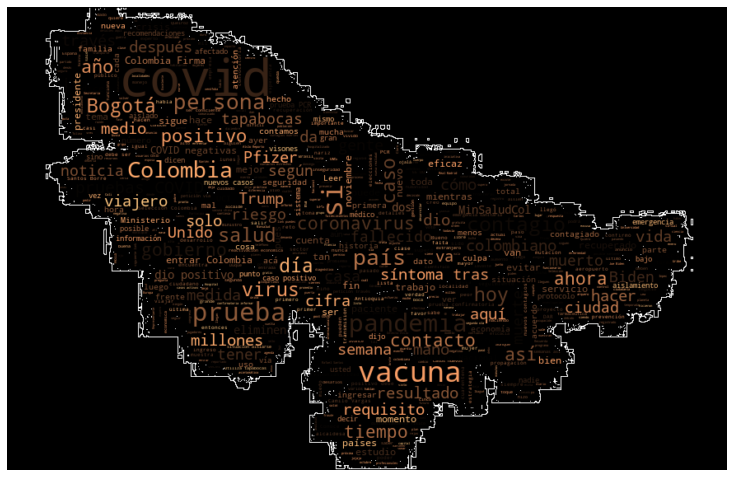

In [76]:
generar_grafico(data,"Colombia.png")

In [79]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

In [80]:
from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    #texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    #texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split() ])
    return texto

In [89]:
data["pp"]= data['clean'].apply(lambda texto: pre_procesado(texto))

In [90]:
# Crear una representación de los documentos en forma de diccionario
dictionary = Dictionary(data['pp'].values)
dictionary

In [94]:
# Filtrar palabras muy frecuentes y poco frecuentes
dictionary.filter_extremes(no_below=20, no_above=0.4)
corpus = [dictionary.doc2bow(text) for text in data['pp'].values]

In [98]:
#Train the topic model
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=60)

In [99]:
model.print_topics(7)

[(0,
  '0.152*"vacuna" + 0.054*"pfizer" + 0.054*"positivo" + 0.053*"dio" + 0.040*"millones" + 0.039*"biden" + 0.034*"colombia" + 0.031*"tras" + 0.026*"mundo" + 0.025*"trump"'),
 (1,
  '0.087*"pandemia" + 0.039*"contagio" + 0.038*"tapabocas" + 0.038*"aquí" + 0.037*"cómo" + 0.036*"gobierno" + 0.035*"medidas" + 0.029*"puede" + 0.028*"vida" + 0.027*"ser"'),
 (2,
  '0.140*"si" + 0.076*"prueba" + 0.051*"positivo" + 0.038*"contacto" + 0.038*"síntomas" + 0.035*"salud" + 0.033*"personas" + 0.029*"casa" + 0.029*"bien" + 0.023*"cuenta"'),
 (3,
  '0.101*"colombia" + 0.089*"casos" + 0.069*"pruebas" + 0.046*"país" + 0.046*"contagios" + 0.037*"muertes" + 0.036*"nuevos" + 0.029*"requisito" + 0.029*"viajeros" + 0.026*"entrar"'),
 (4,
  '0.061*"virus" + 0.056*"hoy" + 0.050*"ahora" + 0.044*"así" + 0.039*"bogotá" + 0.038*"días" + 0.036*"día" + 0.033*"q" + 0.027*"tener" + 0.027*"año"')]

In [100]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)